### - Sobhan Moradian Daghigh
#### - 5/3/2022
#### - DIP - HW02 - Q1

In [200]:
import numpy as np
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt
import cv2
from IPython.display import display

### Part A.

In [225]:
def make_init_img(init, levels=8):
    slice_size = 50
    blank = np.zeros(np.multiply(init.shape, slice_size)).astype(np.uint8)
    for i, row in enumerate(init):
        for j, value in enumerate(row):
            blank[slice_size * i:slice_size * (i + 1), slice_size * j:slice_size * (j + 1)] = np.array([[round(255 / levels) * value] * slice_size] * slice_size)
    return blank

In [165]:
def convert2negative(img):
    for i, row in enumerate(img):
        for j, value in enumerate(row):
            img[i, j] = 255 - value
    return img

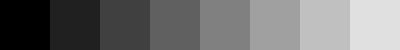

In [229]:
demo = np.array([[0, 1, 2, 3, 4, 5, 6, 7]])
Image.fromarray(make_init_img(demo))

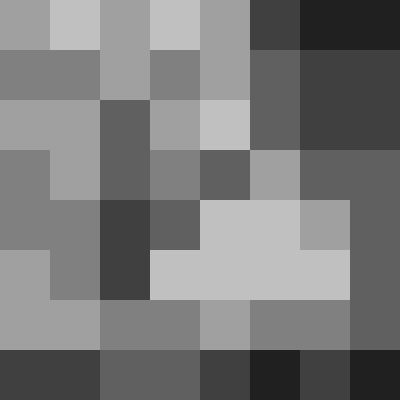

In [230]:
init = np.array([[5, 6, 5, 6, 5, 2, 1, 1],
                 [4, 4, 5, 4, 5, 3, 2, 2],
                 [5, 5, 3, 5, 6, 3, 2, 2],
                 [4, 5, 3, 4, 3, 5, 3, 3],
                 [4, 4, 2, 3, 6, 6, 5, 3],
                 [5, 4, 2, 6, 6, 6, 6, 3],
                 [5, 5, 4, 4, 5, 4, 4, 3],
                 [2, 2, 3, 3, 2, 1, 2, 1]])

img = make_init_img(init)
Image.fromarray(img)

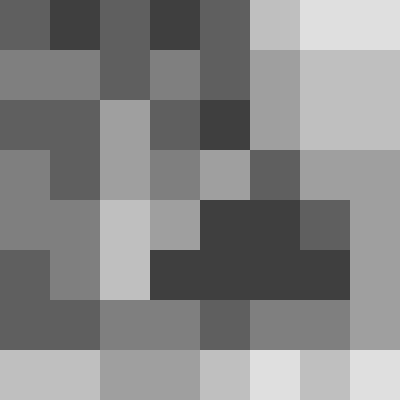

In [231]:
negative = convert2negative(img)
Image.fromarray(negative)

### Part B.

In [ ]:
def bit_plane_sclicer(init, init_bits=3):
    print('Original')
    display(Image.fromarray(make_init_img(init)))
    planed = []
    for i, row in enumerate(init):
        for j, value in enumerate(row):
            planed.append(np.binary_repr(init[i, j], width=init_bits))
            
    for bit in range(init_bits):
        img = (np.array([int(bits[bit]) for bits in planed], dtype=np.uint8)).reshape(init.shape)
        print('Bit plane {}'.format(bit + 1))
        display(Image.fromarray(make_init_img(img, levels=1)))

Original


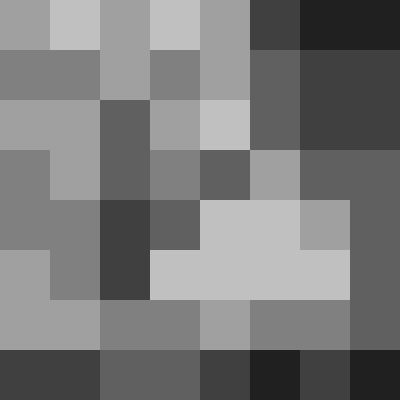

Bit plane 1


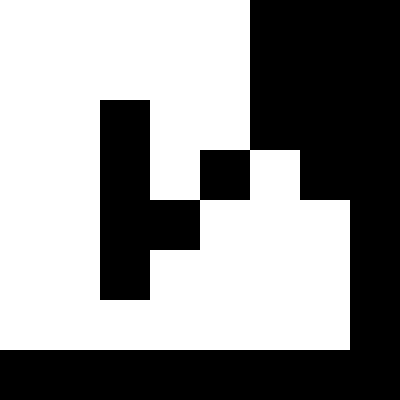

Bit plane 2


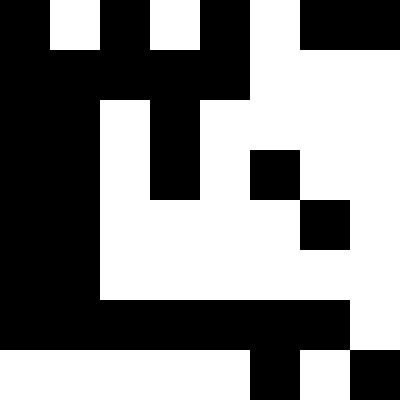

Bit plane 3


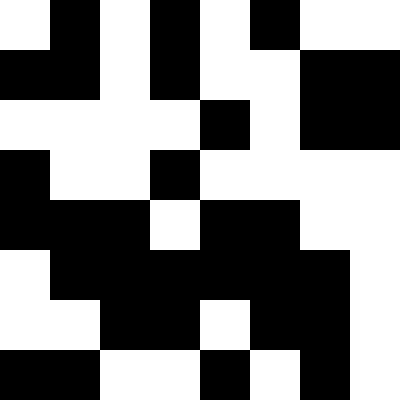

In [237]:
bit_plane_sclicer(init)

### Part C.